In [1]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)
y = model.sampling().extract()['y']
y.mean()  # with luck the result will be near 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


-0.036107469752448225

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma; 
}
model {
    y ~ normal(alpha + beta*x, sigma);
}"""

In [7]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot the data
x = 10 * np.random.rand(100)
y = alpha + beta*x
y = np.random.normal(y, scale = sigma)

In [8]:
# Put our data in dictionary
data = {'N': len(x), 'x': x, 'y': y}

#Compile the model
sm = pystan.StanModel(model_code=model)

#Train the model and generate 
fit = sm.sampling(data = data, iter = 1000, chains = 4, warmup = 500, thin=1, seed = 101)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_855fc1b4b34c51a65d5e55bff2f8ec0a NOW.


In [11]:
print(fit.stansummary())

Inference for Stan model: anon_model_855fc1b4b34c51a65d5e55bff2f8ec0a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   3.85  6.6e-3    0.2   3.47   3.72   3.84   3.99   4.26    937    1.0
beta    0.52  1.1e-3   0.03   0.45    0.5   0.52   0.54   0.58    952    1.0
sigma   1.01  2.3e-3   0.07   0.88   0.96   1.01   1.06   1.17    962    1.0
lp__  -50.66    0.05   1.24 -53.93 -51.18 -50.32 -49.77 -49.28    677    1.0

Samples were drawn using NUTS at Fri Apr  1 12:50:05 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [12]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df['mean']['alpha'], df['mean']['beta']

# Extracting traces
alpha = fit['alpha']
beta = fit['beta']
sigma = fit['sigma']
lp = fit['lp__']

# Coin Toss inference

In [15]:
import pystan
import pickle
import numpy as np
import arviz as az
import pandas as pd
import seaborn as sns
import statsmodels.api as statmod
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

C:\Users\Usuario\Anaconda3\envs\myenv2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

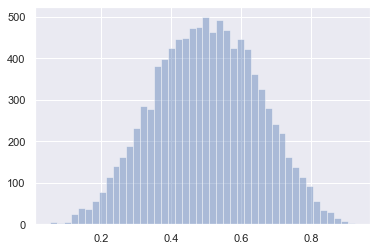

In [16]:
sns.distplot(np.random.beta(5,5, size=10000),kde=False)

In [22]:
# bernoulli model
model_code = """
    data {
      int<lower=0> N;
      int<lower=0,upper=1> y[N];
    }
    parameters {
      real<lower=0,upper=1> theta;
    }
    model {
      theta ~ beta(5, 5);
      for (n in 1:N)
          y[n] ~ bernoulli(theta);
    }
    """
data = dict(N=10, y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
model = pystan.StanModel(model_code=model_code)
fit = model.sampling(data=data,iter=4000, chains=4, warmup=1000)
la = fit.extract(permuted=True)  # return a dictionary of arrays
print(fit.stansummary())

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d3835c4370ff5e66f1e88bd3eac647ff NOW.


Inference for Stan model: anon_model_d3835c4370ff5e66f1e88bd3eac647ff.
4 chains, each with iter=4000; warmup=1000; thin=1; 
post-warmup draws per chain=3000, total post-warmup draws=12000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.25  1.3e-3   0.09   0.09   0.18   0.24   0.31   0.46   4939    1.0
lp__  -11.76    0.01   0.74 -13.84 -11.94 -11.48  -11.3 -11.25   5189    1.0

Samples were drawn using NUTS at Fri Apr  1 14:14:34 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
